## rdkit 分子修改

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

## 简单的分子修改
### 氢原子显示与隐藏
正常情况下，分子在rdkit中存储时，氢以隐式氢的形式存储，即不会在图片中显示出来。当需要加入氢原子时，例如要生成和优化立体结构，可以通过函数加上氢原子。

```python
rdkit.Chem.rdmolops.AddHs(
    (Mol)mol   # 要修饰的分子
    [,(bool) explicitOnly = False # （可选）如果设置了此切换，则仅将显式Hs添加到分子中。默认值为0（添加隐式和显式Hs）。
    [,(bool) addCoords = False # (可选) 如果设置了此开关，则Hs将设置3D坐标。默认值为0（无3D坐标）。
    [,(AtomPairsParameters) onlyOnAtoms = None  # （可选）如果提供了此序列，则仅将这些原子视为具有添加的Hs
    [,(bool)addResidueInfo = False # （可选）如果为true，则将残基信息添加到氢原子（对PDB文件有用）。
    ]]]]
)
```



```python
rdkit.Chem.rdmolops.RemoveHs(
    (Mol)mol  # 要修饰的分子
    [，（bool）implicitOnly = False # hiddenOnly ：（可选）如果设置了此切换，则只会从图中删除隐式Hs。默认值为0（删除隐式和显式Hs）。
    [，（bool）updateExplicitCount = False  #（可选）如果设置了此切换，则将更新具有Hs的原子的显式H计数。默认值为0（不更新显式H计数）。
    [，（bool）sanitize = True  # （可选）如果设置了此切换开关，则去除Hs后将对分子进行消毒。缺省值为1（进行消毒）。
    ] ] ])
```

In [5]:
mol = Chem.MolFromSmiles("CCO")
print(mol.GetNumAtoms())

mol = Chem.AddHs(mol)
print(mol.GetNumAtoms())

mol = Chem.RemoveAllHs(mol)
print(mol.GetNumAtoms())

3
9
3


### 芳香键与kekule式转换
芳香键在Rdkit中存储类型为"AROMATIC"，可以转化为kelule式：Kekulize()
将芳香键的类型修改为单双建的类型

In [8]:
mol = Chem.MolFromSmiles('c1ccccc1')

for bond in mol.GetBonds():
    print(bond.GetBondType())
    
Chem.Kekulize(mol)

for bond in mol.GetBonds():
    print(bond.GetBondType())
    


AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
DOUBLE
SINGLE
DOUBLE
SINGLE
DOUBLE
SINGLE


True

转化后，类型中虽然变为单键和双键，但依然是芳香键    


In [9]:
mol.GetBondWithIdx(1).GetIsAromatic()

True

之所以仍然为芳香键，是因为分子有一个跟芳香性相关的属性Flags，记录了芳香性的信息。可以在kelulize时将`clearAromaticFlags`参数设置为True

In [11]:
Chem.Kekulize(mol, clearAromaticFlags=True)
print(mol.GetBondWithIdx(0).GetBondType())

print(mol.GetBondWithIdx(1).GetIsAromatic())


DOUBLE
False


如果想修改回芳香键，可以对分子进行检查：`SanitizeMol()`

In [12]:
Chem.SanitizeMol(mol)

print(mol.GetBondWithIdx(0).GetBondType())

AROMATIC


## 复杂的分子修饰
### Atom和Bond对象的编辑功能
**Atom对象**
在rdkit的Atom对象中也提供了一系列功能，可以对分子进行原位编辑。
- 修改形式电荷：atom.SetFormalCharge(int)
- 修改杂化方式为SP3：atom.HybridizationType(Chem.HybridizationType.SP3)
- 修改为芳香原子：atom.SetIsAromatic(True)
- 修改为同位素标记原子：atom.SetIsotope(int)
- 不带隐式氢：atom.SetNoImplicit(True)
- 固定显示氢：atom.SetNumExplicitHs(int)

**Bond对象**
- 修改键的显示方式：SetBondDir(Chem.BondDir.BEGINDASH)
- 修改为芳香键：SetBondType(Chem.BondType.AROMATIC)
- 修改键芳香性的Flags：SetIsAromatic(bool)
- 是否共轭：SetIsConjugated(bool)




# 修改手性碳：`SetChiralTag()`
- 参数设置为Chem.ChiralType.CHI_TETRAHEDRAL_CCW时，为S型（Counter Clockwise，逆时针）
- 参数设置为Chem.ChiralType.CHI_TETRAHEDRAL_CW时，为R型（Clockwise，顺时针）
- 还有CHI_OTHER、CHI_UNSPECIFIED不指定类型

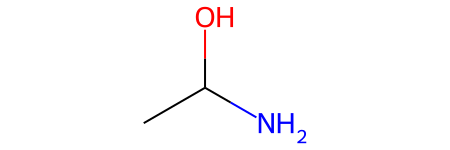

In [35]:
mol = Chem.MolFromSmiles('OC(N)C')
mol

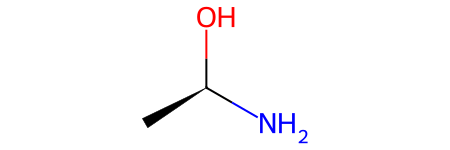

In [16]:
mol.GetAtomWithIdx(1).SetChiralTag(Chem.ChiralType.CHI_TETRAHEDRAL_CW)

mol

## 修改原子：`atom.SetAtomicNum()`

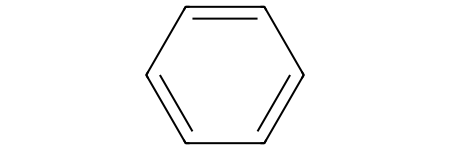

In [21]:
mol = Chem.MolFromSmiles('c1ccccc1')
mol



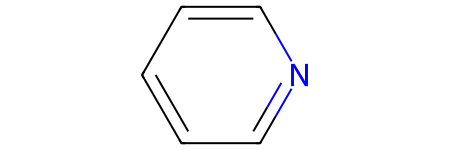

In [23]:
mol.GetAtomWithIdx(0).SetAtomicNum(7)
Chem.SanitizeMol(mol)
mol

## 修改键类型

In [24]:
# 从SMILES字符串创建分子对象
mol = Chem.MolFromSmiles('CCO')

# 将第一个碳原子和第二个碳原子之间的键改为双键
mol.GetBondBetweenAtoms(0, 1).SetBondType(Chem.rdchem.BondType.DOUBLE)

# 输出修改键类型后的SMILES字符串
print(Chem.MolToSmiles(mol))

C=CO


## RWMol编辑 
更复杂的操作可以使用rdkit.Chem.rdchem.RWMol类（用于分子读写的类）。这个类在修改分子方面，性能更好，它可以提供一个“活动的”分子，并且共享了mol对象的操作接口。修改完毕后，只需要用GetMol()就可以获得最终的分子

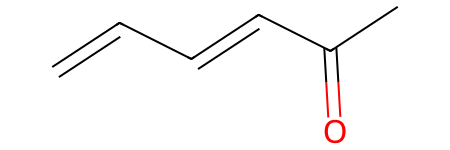

In [26]:
m = Chem.MolFromSmiles('CC(=O)C=CC=C')
mw = Chem.RWMol(m)
mw.GetMol()


In [36]:
# 将Mol对象转换为EditableMol对象
editable_mol = m.EditableMol(mol)
## 然后再进行其他操作

AttributeError: 'Mol' object has no attribute 'EditableMol'

### 重头设计分子

In [28]:
from rdkit import Chem

# 创建RWMol对象
mol = Chem.RWMol()

#### 添加原子：AddAtom(atom)

atom：要添加的原子对象
返回值是新添加原子的索引

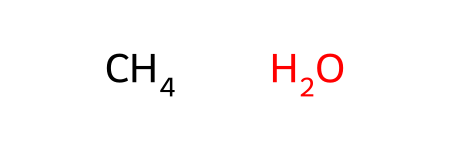

In [29]:
# 添加原子
atom1 = Chem.Atom(6)  # 碳原子
atom2 = Chem.Atom(8)  # 氧原子
mol.AddAtom(atom1)
mol.AddAtom(atom2)

mol

#### 添加键：`AddBond(beginAtomIdx, endAtomIdx, order)`
- `beginAtomIdx`：键的起始原子
- `endAtomIdx`：键的末尾原子
- `order`：键的类型

In [31]:
# 添加键
mol.AddBond(0, 1, Chem.BondType.SINGLE)

# 输出添加原子和键后的SMILES字符串
print(Chem.MolToSmiles(mol))

CO


#### 删除原子：`RemoveAtom()`
传入原子索引
每次删除后，索引都会更新

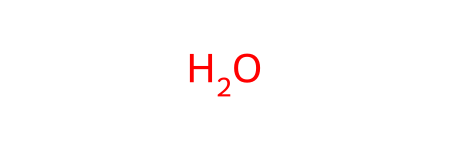

In [32]:
mol.RemoveAtom(0)
mol

#### 其他一些操作Mol的方法，对RWMol也同样适用

sanitize参数设置为SANITIZE_NONE。这意味着在读取分子时不会执行任何验证或修复操作。

In [33]:
print(Chem.MolToSmiles(mol))

print(Chem.SanitizeMol(mol))

print(Chem.MolToSmiles(mol))



O
SANITIZE_NONE
O


#### 修改完后，可以获取该分子的Mol对象：`mw.GetMol()`


In [34]:
print(mol)
m_edit = mol.GetMol()
type(m_edit)



rdkit.Chem.rdchem.Mol